In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import utils
#from keras import backend as Ke
#from google.colab import drive


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
K.clear_session()
#drive_path = '/content/drive'
#project_path = drive_path + '/My Drive/BiometriaPorVoz'#Raiz
#espectro_path = project_path + '/dataCNN/espectogramas'#Espectrogramas

In [ ]:
#Conteo de imagenes en la carpeta espectrogramas
#dirname = os.path.join(os.getcwd(), espectro_path)#Unimos directorio actual con ruta de espectrogramas
#imgpath = dirname + os.sep #contiene la ruta de espectrogramas con "/""
imgpath = 'E:/TrabajoFinGrado/Data2'

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):#Se recorre TODO de la carpeta espectrogramas
    for filename in filenames:#Establecemos regla para los archivos
        if re.search("\.png", filename):#El paquete "re" es utilizado para busqueda de strings, por ello ponemos regla: aquellos que sean .png
            cant=cant+1#Con este contador, contamos imagenes de cada directorio
            filepath = os.path.join(root, filename)#Unimos directorio actual con el filename
            image = plt.imread(filepath)#Se lee la imagen del file para luego ser introducida en un array
            images.append(image)#Añadimos image a el array
            b = "Leyendo..." + str(cant)
            print (b, end="\r")#Se imprime el numero de imagenes
            if prevRoot !=root:
                print(root, cant)#Se imprime ruta del directorio id0001, id0002...
                prevRoot=root
                directories.append(root)#lista de directorios encontrados
                dircount.append(cant)#añadimos numero de imagenes encontradas en cada directorio al array dircount
                cant=0#Se actualiza a 0 la cuenta de imagenes
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)#Se añaden las etiquetas de las imagenes
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)#obtienes solo el nombre del directorio
    print(indice , name[len(name)-1])#me imprimes el indice y su directorio correspondiente
    deportes.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.float64) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  1941
0 id10001
1 id10002
2 id10003
3 id10004
4 id10005
5 id10006
6 id10007
7 id10008
8 id10009
9 id10010
10 id10011
11 id10012
12 id10013
13 id10014
14 id10015
15 id10016
16 id10017
17 id10018
18 id10019
19 id10020
Total number of outputs :  20
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
#Parametros

#numero de iteraciones sobre el set de datos
epocas = 100

#array donde mete cada uno de los pixeles
altura = 100
longitud = 100

#numero de imagenes que procesa
batch_size = 64

#numero de veces que se procesa la informacion
# 1 -> epoca tiene 1000 pasos
pasos = 1000

#al final de cada epoca para comprobar que aprende
pasos_validacion = 200

#primera convolucion
filtros_convolucion1 = 32

#segunda convolucion
filtros_convolucion2 = 64

#primera convolucion (altura,longitud)save_weights
tamanyo_filtro1 = (3,3)

#segunda convolucion (altura, longitud)
tamanyo_filtro2 = (2,2)

#tamaño filtro
tamanyo_pool = (3,3)

#clases = id (numero de carpetas)
num_classes = 20

#lr -> learning ratio
lr = 1e-3

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)#Cargamos imagenes y etiquetas
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot =utils.to_categorical(train_Y)
test_Y_one_hot = utils.to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (1552, 100, 100, 4) (1552,)
Testing data shape :  (389, 100, 100, 4) (389,)
Original label: 14
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(1241, 100, 100, 4) (311, 100, 100, 4) (1241, 20) (311, 20)


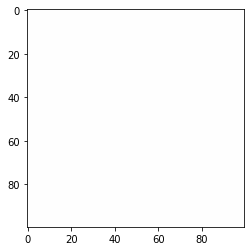

In [ ]:
print(train_X)

In [ ]:
#Creamos nuestra Red Neuronal CNN
cnn = Sequential()

#padding = 'same' -> que hace el filtro en las esquinas
#input_shape -> las imagenes que entregamos a la primera capa tiene altura y longitud. El 3 se anyade por el RGB
cnn.add(Convolution2D(filtros_convolucion1, tamanyo_filtro1,  input_shape=(altura, longitud, 4), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Convolution2D(filtros_convolucion2, tamanyo_filtro2,  activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

#Añadido la ultima capa de 2D
cnn.add(Convolution2D(128, tamanyo_filtro1, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Convolution2D(50, tamanyo_filtro2,  activation='relu'))
#Hace la imagen plana
cnn.add(Flatten())

#256 neuronas
cnn.add(Dense(100, activation='relu'))
#Durante el entrenamiento apaga el 50% de las neuronas -> esto se hace para evitar la sobreajustacion (Aleatorio)
cnn.add(Dropout(0.25))
#Ultima capa, nos ayuda a predecir que porcentaje de acierto tiene
cnn.add(Dense(num_classes, activation='softmax'))

#Durante el entrenamiento su funcion de perdida si va bien o va mal
#Optimizar con el learning ratio
#Metrica -> si va bien
cnn.compile(optimizer=optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 98, 32)        1184      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 50)       

In [ ]:
cnn.fit(train_X, train_label, batch_size=batch_size,epochs=epocas,verbose=1,validation_data=(test_X, test_Y_one_hot))

Train on 1241 samples, validate on 311 samples
Epoch 1/100
1241/1241 [==============================] - 19s 15ms/sample - loss: 2.8971 - acc: 0.1918 - val_loss: 2.8174 - val_acc: 0.1897
Epoch 2/100
1241/1241 [==============================] - 18s 15ms/sample - loss: 2.8170 - acc: 0.2023 - val_loss: 2.8093 - val_acc: 0.1897
Epoch 3/100
1241/1241 [==============================] - 19s 15ms/sample - loss: 2.7925 - acc: 0.2039 - val_loss: 2.8053 - val_acc: 0.1897
Epoch 4/100
1241/1241 [==============================] - 19s 15ms/sample - loss: 2.7914 - acc: 0.2039 - val_loss: 2.8059 - val_acc: 0.1897
Epoch 5/100
1241/1241 [==============================] - 18s 15ms/sample - loss: 2.7859 - acc: 0.2023 - val_loss: 2.8084 - val_acc: 0.1897
Epoch 6/100
1216/1241 [============================>.] - ETA: 0s - loss: 2.7870 - acc: 0.2015

KeyboardInterrupt: ignored

In [ ]:
modelos_dir = project_path + '/dataCNN/modelos'
if not os.path.exists(modelos_dir):
  os.mkdir(modelos_dir)
cnn.save(modelos_dir + '/modelo.h5')
cnn.save_weights(modelos_dir+'/pesos.h5')